In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mofgraph2vec.data.datamodule import DataModuleFactory
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle

In [3]:
config = OmegaConf.load("../conf/config.yaml")
config.doc2label_data = OmegaConf.load("../conf/doc2label_data/qmof.yaml")
config.doc2label_model = OmegaConf.load("../conf/doc2label_model/ensemble.yaml")

In [25]:
config.doc2label_data.task = ["outputs.pbe.bandgap"]

In [16]:
config.doc2label_data.label_path = "../data/qmof-data.csv"
config.doc2label_data.embedding_path = "../experiments/workflow/wandb/offline-run-20230320_165953-5nnlomfl/tmp/embedding_dv.csv"

In [26]:
dmf = DataModuleFactory(**config.doc2label_data)

/Users/xiaoqi/Documents/projects/proj_unsupervisedML/codes/MOFgraph2vec/src/mofgraph2vec/data/datamodule.py:41: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_label = pd.read_csv(label_path)
2023-03-21 10:49:09.015 | INFO     | mofgraph2vec.data.datamodule:__init__:65 - Train: 16503 Valid: 1834 Test: 2038


In [27]:
train_ds = dmf.get_train_dataset()
valid_ds = dmf.get_valid_dataset()
test_ds = dmf.get_test_dataset()

/Users/xiaoqi/Documents/projects/proj_unsupervisedML/codes/MOFgraph2vec/src/mofgraph2vec/data/dataset.py:11: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_labels = pd.read_csv(label_file).set_index(MOF_id)
/Users/xiaoqi/Documents/projects/proj_unsupervisedML/codes/MOFgraph2vec/src/mofgraph2vec/data/dataset.py:11: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df_labels = pd.read_csv(label_file).set_index(MOF_id)
/Users/xiaoqi/Documents/projects/proj_unsupervisedML/codes/MOFgraph2vec/src/mofgraph2vec/data/dataset.py:11: DtypeWarning: Columns (41,42,44,45,46,47,48,50,51,52,53,54,56,57,58,66,67,68,69,70,78,79,80,81,82,90,91,92,93,94) have mixed types. Specify dtype option on import or set low_memory=Fals

In [33]:
model = pickle.load(open("../experiments/workflow/wandb/offline-run-20230321_105407-azp04vmf/tmp/best_model.pkl", 'rb'))

In [34]:
train_pred = model.predict(train_ds.vectors)
test_pred = model.predict(test_ds.vectors)

train_true = train_ds.labels.numpy()
test_true = test_ds.labels.numpy()

Text(0, 0.5, 'Predicted $CO_2$ $logk_H$')

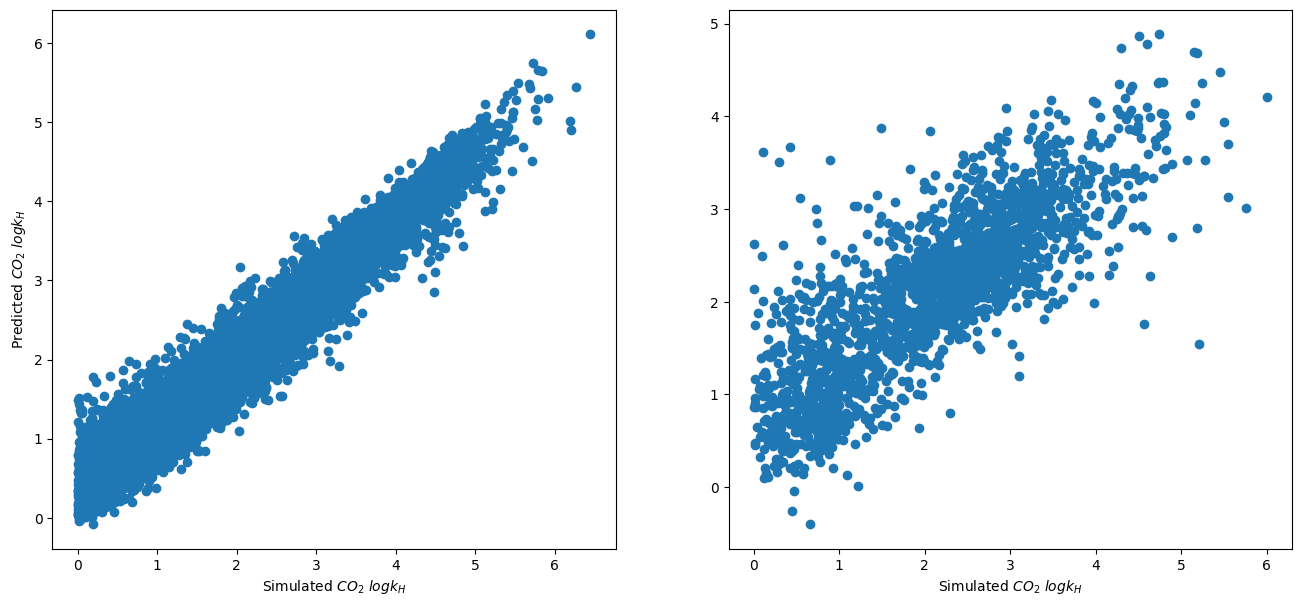

In [35]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,7)

ax[0].scatter(train_true, train_pred)

ax[1].scatter(test_true, test_pred)

ax[0].set_xlabel("Simulated $CO_2$ $logk_H$")
ax[1].set_xlabel("Simulated $CO_2$ $logk_H$")
ax[0].set_ylabel("Predicted $CO_2$ $logk_H$")

In [38]:
model.test(test_ds.vectors, test_ds.labels, dmf.target_transform)

{'test_mse': 0.20595019, 'test_mae': 0.3411733, 'test_r2': -16.064385502704756}